<a href="https://colab.research.google.com/github/Yash-Wasalwar-07/TensorFlow-BootCamp/blob/main/Course-Notes/03_Computer_Viision_using_TensorFlow_(Binary_CLassification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


## Get the data

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

> **🔑 Note**: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-04-03 16:15:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   140MB/s    in 0.7s    

2022-04-03 16:15:53 (140 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Take a look at our data (crucial step before any ml project)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find how many images are in a file
len(os.listdir("pizza_steak/train/steak"))

750

To visualize our images, first let's get the class names progrmatically!

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# just doing fun...
4*5 if 0>2 else -1

-1

In [ ]:
for item in data_dir.glob("*"):
  print(item)

pizza_steak/train/steak
pizza_steak/train/pizza


In [ ]:
# Let's visualize our image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


array([[[ 85,  72, 128],
        [ 90,  75, 132],
        [ 88,  73, 128],
        ...,
        [ 72,  30,  42],
        [ 70,  30,  41],
        [ 72,  32,  41]],

       [[ 85,  70, 127],
        [ 84,  69, 126],
        [ 82,  67, 122],
        ...,
        [ 69,  27,  39],
        [ 67,  27,  38],
        [ 68,  28,  37]],

       [[ 86,  71, 128],
        [ 80,  65, 122],
        [ 81,  64, 119],
        ...,
        [ 70,  28,  40],
        [ 68,  26,  38],
        [ 68,  28,  37]],

       ...,

       [[250, 231, 216],
        [251, 232, 217],
        [251, 232, 217],
        ...,
        [240, 218, 197],
        [241, 219, 198],
        [242, 220, 199]],

       [[250, 231, 216],
        [250, 231, 216],
        [251, 232, 217],
        ...,
        [241, 219, 198],
        [240, 218, 197],
        [240, 218, 197]],

       [[250, 231, 217],
        [250, 231, 217],
        [251, 232, 218],
        ...,
        [241, 219, 198],
        [239, 217, 196],
        [238, 216, 195]]

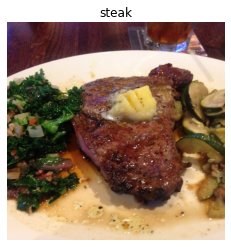

In [ ]:
# View random image from training dataset
img_steak = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")
img_steak

Image shape: (384, 512, 3)


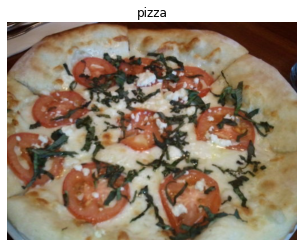

In [ ]:
# View random image from training dataset
img_pizza = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
img_steak

array([[[ 85,  72, 128],
        [ 90,  75, 132],
        [ 88,  73, 128],
        ...,
        [ 72,  30,  42],
        [ 70,  30,  41],
        [ 72,  32,  41]],

       [[ 85,  70, 127],
        [ 84,  69, 126],
        [ 82,  67, 122],
        ...,
        [ 69,  27,  39],
        [ 67,  27,  38],
        [ 68,  28,  37]],

       [[ 86,  71, 128],
        [ 80,  65, 122],
        [ 81,  64, 119],
        ...,
        [ 70,  28,  40],
        [ 68,  26,  38],
        [ 68,  28,  37]],

       ...,

       [[250, 231, 216],
        [251, 232, 217],
        [251, 232, 217],
        ...,
        [240, 218, 197],
        [241, 219, 198],
        [242, 220, 199]],

       [[250, 231, 216],
        [250, 231, 216],
        [251, 232, 217],
        ...,
        [241, 219, 198],
        [240, 218, 197],
        [240, 218, 197]],

       [[250, 231, 217],
        [250, 231, 217],
        [251, 232, 218],
        ...,
        [241, 219, 198],
        [239, 217, 196],
        [238, 216, 195]]

Image shape: (512, 512, 3)


array([[[ 14,   4,   2],
        [ 14,   4,   2],
        [ 14,   4,   2],
        ...,
        [255, 255, 244],
        [252, 253, 237],
        [244, 243, 223]],

       [[ 14,   4,   2],
        [ 14,   4,   2],
        [ 14,   4,   2],
        ...,
        [255, 255, 244],
        [250, 251, 235],
        [241, 240, 222]],

       [[ 15,   5,   3],
        [ 15,   5,   3],
        [ 15,   5,   3],
        ...,
        [255, 255, 246],
        [250, 248, 233],
        [238, 235, 218]],

       ...,

       [[171,  58,   0],
        [190,  77,  17],
        [207,  97,  36],
        ...,
        [250, 141,  56],
        [249, 140,  55],
        [249, 140,  55]],

       [[177,  68,   0],
        [211, 104,  34],
        [230, 123,  53],
        ...,
        [250, 141,  56],
        [249, 140,  55],
        [249, 140,  55]],

       [[181,  75,   1],
        [226, 123,  48],
        [244, 141,  66],
        ...,
        [248, 139,  54],
        [247, 138,  53],
        [246, 137,  52]]

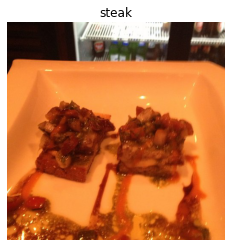

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")
img

In [ ]:
random_image = random.sample(os.listdir("pizza_steak/train/steak"), 1)
random_image[0]

'213765.jpg'

Image shape: (382, 512, 3)


array([[[ 91, 109,  67],
        [ 85, 100,  59],
        [112, 123,  81],
        ...,
        [162, 165, 158],
        [160, 163, 156],
        [159, 162, 153]],

       [[105, 122,  86],
        [118, 132,  97],
        [148, 158, 123],
        ...,
        [161, 164, 157],
        [159, 162, 155],
        [159, 160, 152]],

       [[148, 162, 139],
        [176, 188, 164],
        [205, 211, 185],
        ...,
        [160, 161, 155],
        [158, 159, 153],
        [157, 158, 150]],

       ...,

       [[133, 108,  67],
        [132, 107,  66],
        [135, 110,  69],
        ...,
        [122, 111,  79],
        [121, 112,  79],
        [121, 112,  79]],

       [[124,  99,  58],
        [130, 105,  64],
        [136, 111,  70],
        ...,
        [125, 115,  80],
        [127, 117,  82],
        [124, 116,  80]],

       [[124,  99,  58],
        [131, 106,  65],
        [138, 113,  72],
        ...,
        [127, 117,  82],
        [131, 121,  86],
        [126, 118,  82]]

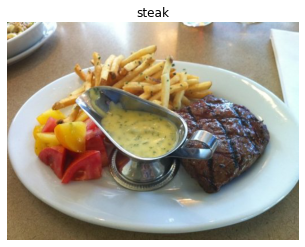

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")
img

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 91, 109,  67],
        [ 85, 100,  59],
        [112, 123,  81],
        ...,
        [162, 165, 158],
        [160, 163, 156],
        [159, 162, 153]],

       [[105, 122,  86],
        [118, 132,  97],
        [148, 158, 123],
        ...,
        [161, 164, 157],
        [159, 162, 155],
        [159, 160, 152]],

       [[148, 162, 139],
        [176, 188, 164],
        [205, 211, 185],
        ...,
        [160, 161, 155],
        [158, 159, 153],
        [157, 158, 150]],

       ...,

       [[133, 108,  67],
        [132, 107,  66],
        [135, 110,  69],
        ...,
        [122, 111,  79],
        [121, 112,  79],
        [121, 112,  79]],

       [[124,  99,  58],
        [130, 105,  64],
        [136, 111,  70],
        ...,
        [125, 115,  80],
        [127, 117,  82],
        [124, 116,  80]],

       [[124,  99,  58],
        [131, 106,  65],
        [138, 113,  72],
        ...,
        [127, 117,  8

In [ ]:
# View the image shape
img.shape # returns width, height, color channel

(382, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/225.

array([[[0.40444444, 0.48444444, 0.29777778],
        [0.37777778, 0.44444444, 0.26222222],
        [0.49777778, 0.54666667, 0.36      ],
        ...,
        [0.72      , 0.73333333, 0.70222222],
        [0.71111111, 0.72444444, 0.69333333],
        [0.70666667, 0.72      , 0.68      ]],

       [[0.46666667, 0.54222222, 0.38222222],
        [0.52444444, 0.58666667, 0.43111111],
        [0.65777778, 0.70222222, 0.54666667],
        ...,
        [0.71555556, 0.72888889, 0.69777778],
        [0.70666667, 0.72      , 0.68888889],
        [0.70666667, 0.71111111, 0.67555556]],

       [[0.65777778, 0.72      , 0.61777778],
        [0.78222222, 0.83555556, 0.72888889],
        [0.91111111, 0.93777778, 0.82222222],
        ...,
        [0.71111111, 0.71555556, 0.68888889],
        [0.70222222, 0.70666667, 0.68      ],
        [0.69777778, 0.70222222, 0.66666667]],

       ...,

       [[0.59111111, 0.48      , 0.29777778],
        [0.58666667, 0.47555556, 0.29333333],
        [0.6       , 0

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into tensors
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters = 10,
                                 kernel_size = 3,
                                 activation = "relu",
                                 input_shape = (224,224,3)), #input layer
          tf.keras.layers.Conv2D(10, 3, activation = "relu"),
          tf.keras.layers.MaxPool2D(pool_size = 2,
                                    padding = "valid"),
          tf.keras.layers.Conv2D(10, 3, activation = "relu"),
          tf.keras.layers.Conv2D(10, 3, activation = "relu"),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#3. fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 258ms/step - loss: 0.5597 - accuracy: 0.7193 - val_loss: 0.4127 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4083 - accuracy: 0.8227 - val_loss: 0.3594 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3964 - accuracy: 0.8340 - val_loss: 0.3505 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3521 - accuracy: 0.8480 - val_loss: 0.3691 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3402 - accuracy: 0.8540 - val_loss: 0.2953 - val_accuracy: 0.8700


In [ ]:
train_datagen

> **🔑 Note :** If above cell is taking longer than ~ 10 seconds per epoch, make sure you are using GPU..

Go to `Runtime` -> `Change Runtime Type` -> Select `GPU` in `Hardware Accelarator` -> Save

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 92s 2s/step - loss: 0.5860 - accuracy: 0.6987 - val_loss: 0.4381 - val_accuracy: 0.8320



In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [ ]:
# set random seed
tf.random.set_seed(42)

#create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid")

])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 308ms/step - loss: 1.4671 - accuracy: 0.4847 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameter than a CNN model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 4.5136 - accuracy: 0.5993 - val_loss: 0.9914 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 1.0716 - accuracy: 0.6713 - val_loss: 1.8974 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8672 - accuracy: 0.7100 - val_loss: 0.4884 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.6261 - accuracy: 0.7553 - val_loss: 0.5458 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5666 - accuracy: 0.7533 - val_loss: 0.4354 - val_accuracy: 0.7960


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15073201 / 31101

484.6532587376612

The number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary Classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Become one with data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


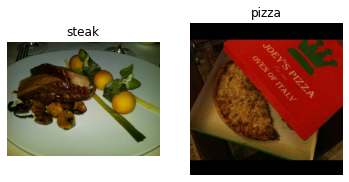

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
COz 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20&t=na1R_PeWRD0rQHwMyc6i1Q

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)




In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# GEt a sample of trainig data batch 
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data) # 47 batches -> round(1500/32)

47

In [ ]:
images[:2]

array([[[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],

        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],

        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],

        ...,

        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352943]

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with baseline model)

A baseline model is a simple model or existing result that you setup when beginning to build a machine learning model...

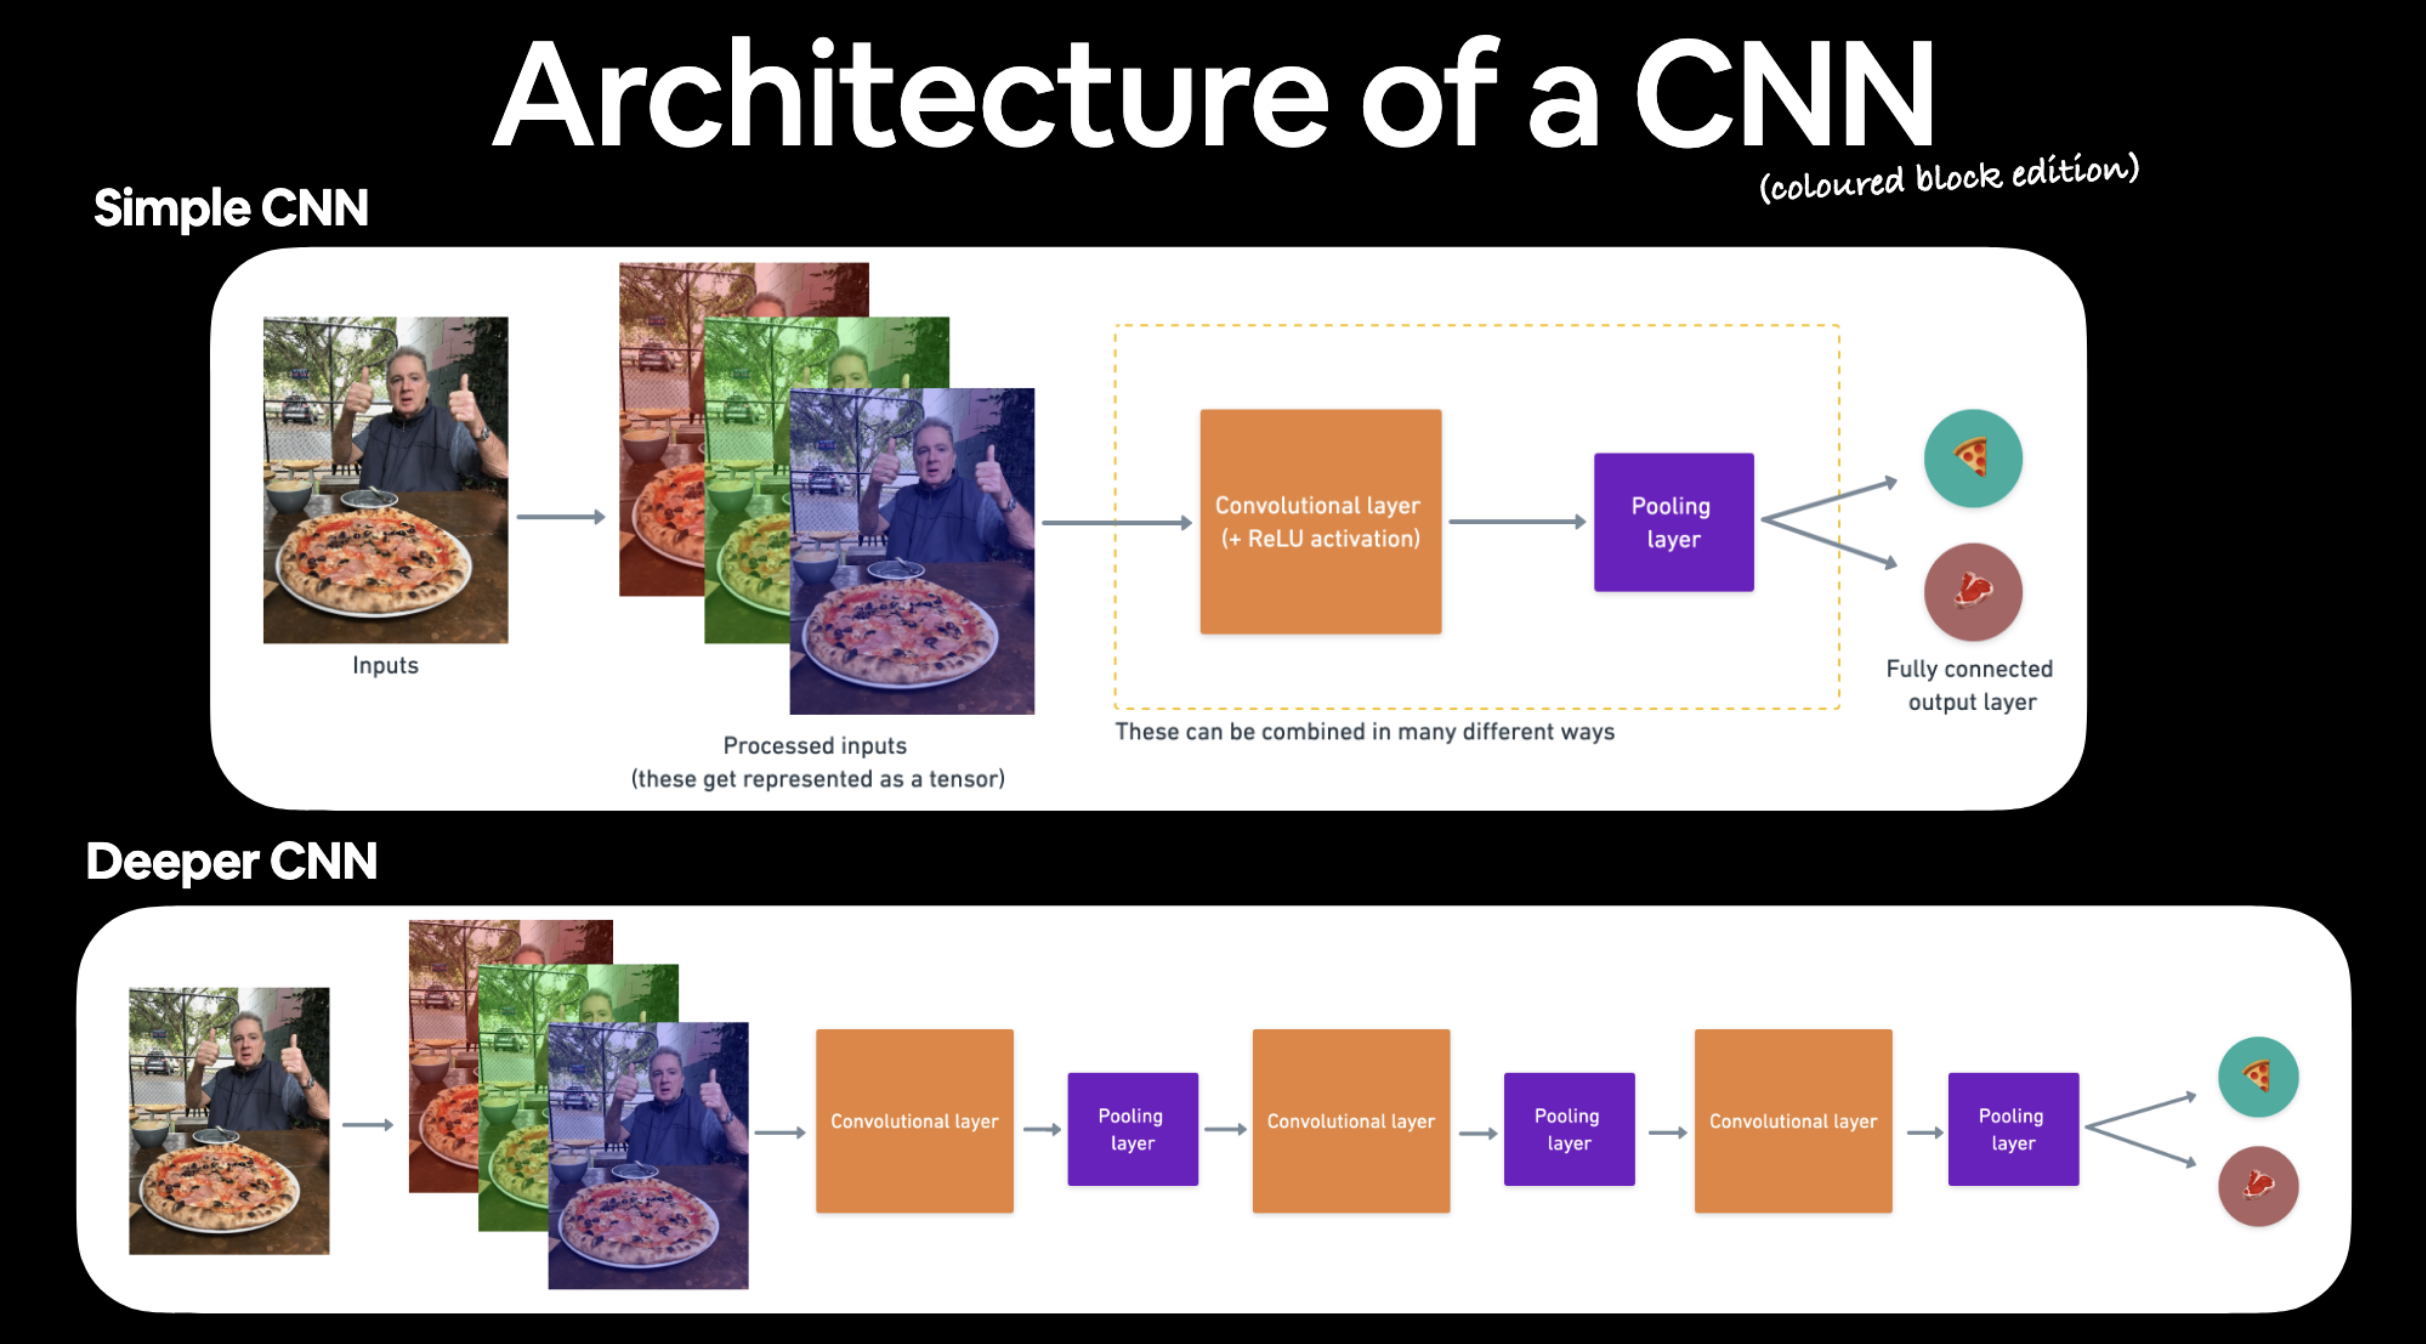

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, #NO. OF SLIDING WINDOWS
         kernel_size=3, #size of sliding window
         strides=1, # size of step the sliding window 
         padding='valid', #if "same", output shape same as input shape, if "valid"
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])



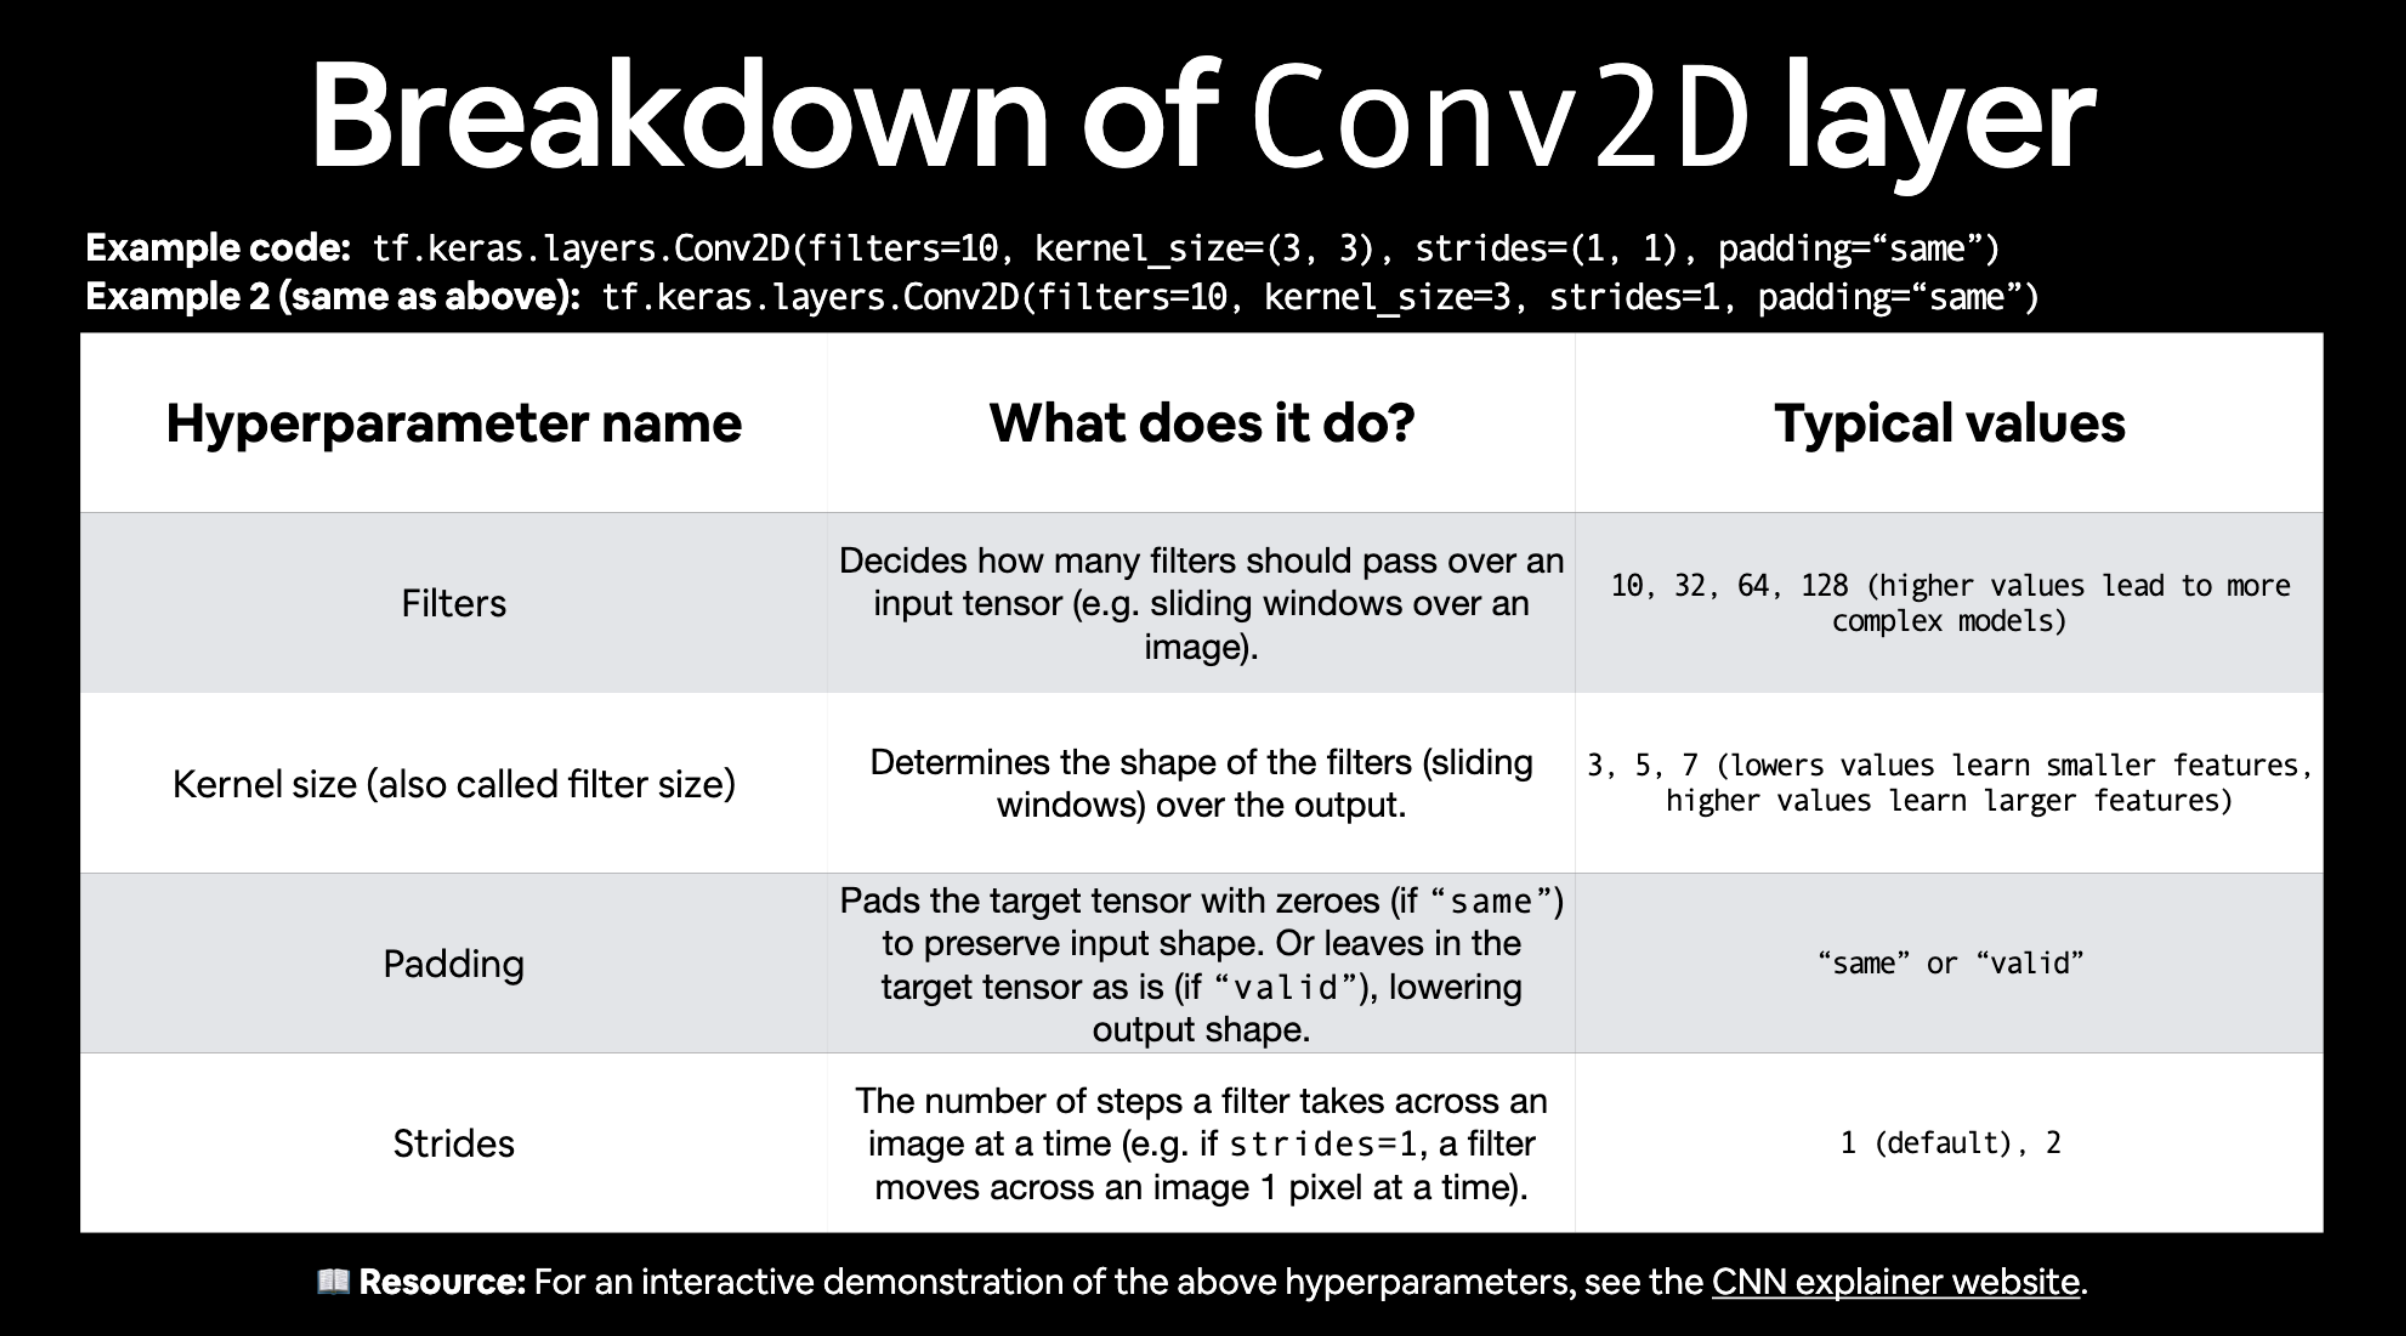

In [ ]:
# Get model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 259ms/step - loss: 1.0066 - accuracy: 0.6913 - val_loss: 0.4277 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4445 - accuracy: 0.8013 - val_loss: 0.3956 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.3145 - accuracy: 0.8853 - val_loss: 0.4186 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.1483 - accuracy: 0.9507 - val_loss: 0.4718 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.0453 - accuracy: 0.9913 - val_loss: 0.5151 - val_accuracy: 0.8080


### 5. Evaluate our model

It looks like our model is learning, let's evaluate using some different metrics

In [ ]:
history_4.history['accuracy']

[0.6913333535194397,
 0.8013333082199097,
 0.8853333592414856,
 0.9506666660308838,
 0.9913333058357239]

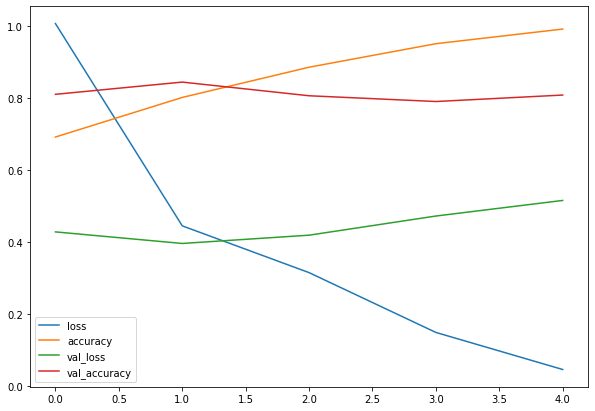

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
    returns seperate loss curves for training and test datasets
  """

  loss_training = pd.DataFrame({"loss": history["loss"],
                                "accuracy": history["accuracy"]})
  
  loss_test = pd.DataFrame({"loss": history["val_loss"],
                                "accuracy": history["val_accuracy"]})
  
  plt.figure(figsize = (20, 8))
  plt.subplot(1,2,1)
  plt.plot(loss_training)
  plt.subplot(1,2,2)
  plt.plot(loss_test);

  

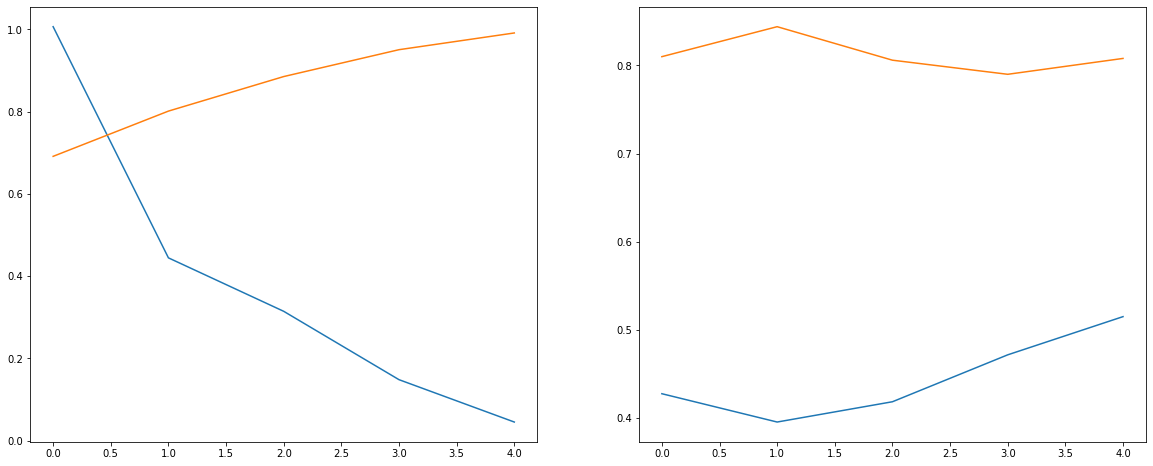

In [ ]:
plot_loss_curves(history_4.history)

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves_2(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize = (22, 7))
  plt.subplot(1,2,1)
  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  # plt.figure()
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

> 🔑 **Note**: When a model's **validation loss starts to increase**, it's likely that our model is tending towards **overfitting**. This results in decrease of accuracy of our model on validation set

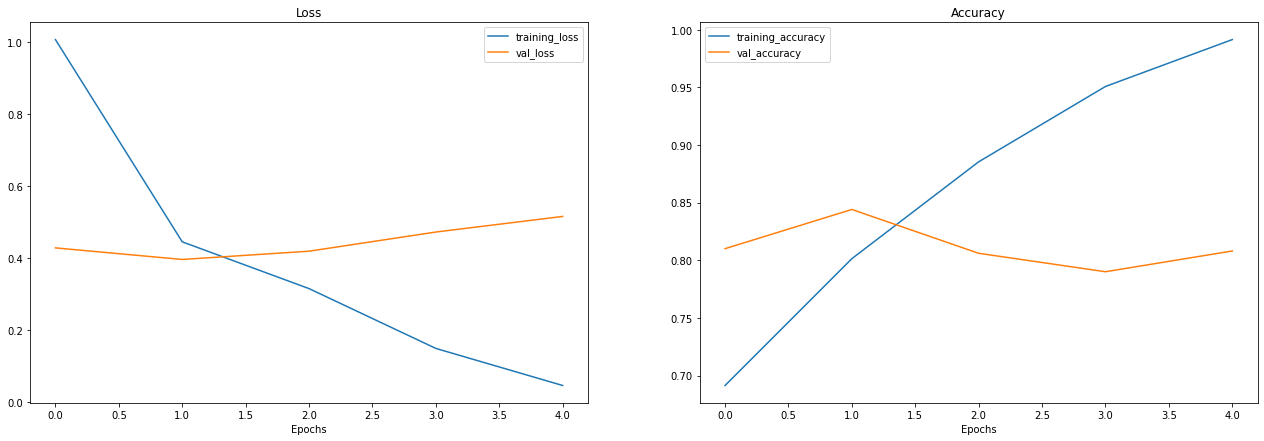

In [ ]:
plot_loss_curves_2(history_4)

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer

Reduce overfitting:

1. Add data augmentation
2. Add regularization layers (such as MaxPool2D)
3. Add more data...

🔑 Note: Reducing overfitting is also known as regularization.

In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6032 - accuracy: 0.6680 - val_loss: 0.4487 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4753 - accuracy: 0.7920 - val_loss: 0.4399 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4442 - accuracy: 0.8027 - val_loss: 0.3789 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4095 - accuracy: 0.8240 - val_loss: 0.3849 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3995 - accuracy: 0.8247 - val_loss: 0.3437 - val_accuracy: 0.8580


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

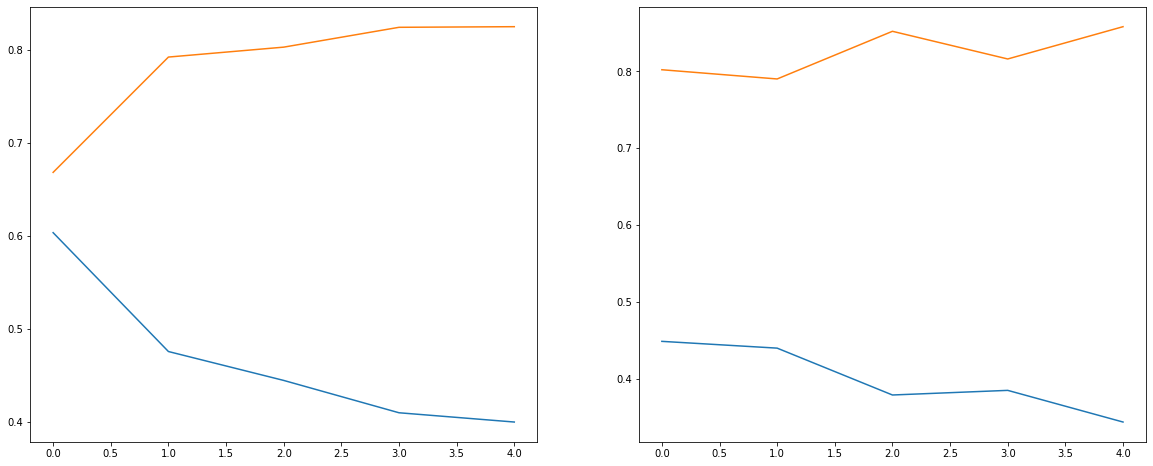

In [ ]:
plot_loss_curves(history_5.history)

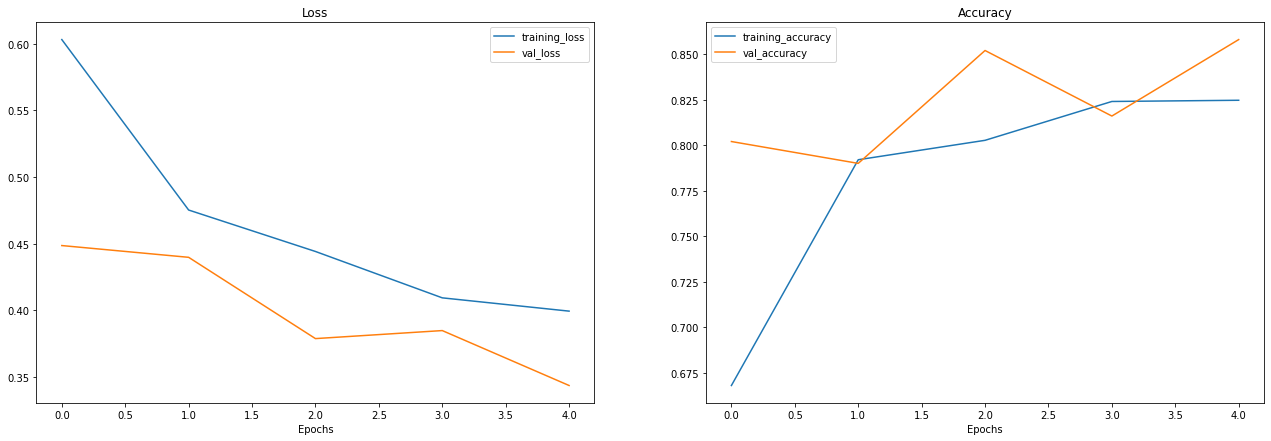

In [ ]:
plot_loss_curves_2(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image? 

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 Question: **What is data augmentation?**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...



In [ ]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                         target_size = (224,224),
                                         batch_size = 32,
                                         class_mode = "binary",
                                         shuffle = False)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 Note: Data augmentation is usually only performed on the training data.  
Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample augmented
images, labels = train_data.next()

augmented_image, augmented_labels = train_data_augmented.next()


Showing image number: 17


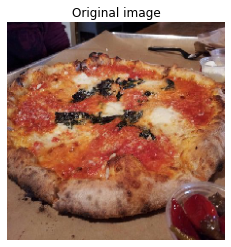

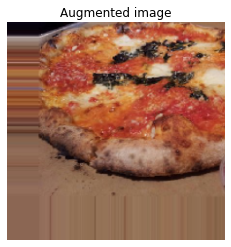

In [ ]:
import random
random_number =  random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_image[random_number])
plt.title("Augmented image")
plt.axis(False);

In [ ]:
len(images)

32

Now we've seen what augmented data look likes, 
let's build a model and see how it performs.

In [ ]:
model_6 = Sequential([
        Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Flatten(),
        Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6970 - accuracy: 0.4993 - val_loss: 0.6787 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6966 - accuracy: 0.5280 - val_loss: 0.6546 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6677 - accuracy: 0.6360 - val_loss: 0.5997 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6611 - accuracy: 0.6573 - val_loss: 0.5724 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6356 - accuracy: 0.6767 - val_loss: 0.5321 - val_accuracy: 0.7940


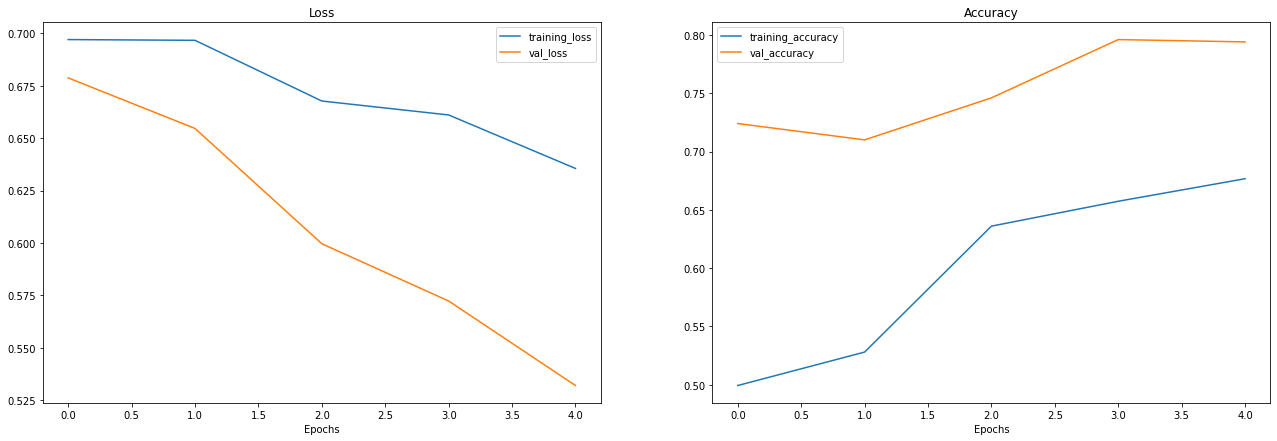

In [ ]:
plot_loss_curves_2(history_6)

In [ ]:
print("Shuffled and Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size = (224, 224),
                                                                           batch_size = 32,
                                                                           class_mode = "binary",
                                                                           shuffle = True)

Shuffled and Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create model 7
model_7 = Sequential([
        Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
        MaxPool2D(),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 36s 741ms/step - loss: 0.6093 - accuracy: 0.6600 - val_loss: 0.4256 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 33s 695ms/step - loss: 0.4973 - accuracy: 0.7587 - val_loss: 0.3751 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 37s 777ms/step - loss: 0.4966 - accuracy: 0.7687 - val_loss: 0.4432 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 38s 809ms/step - loss: 0.4661 - accuracy: 0.7867 - val_loss: 0.3204 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 35s 753ms/step - loss: 0.4505 - accuracy: 0.8013 - val_loss: 0.3991 - val_accuracy: 0.8220


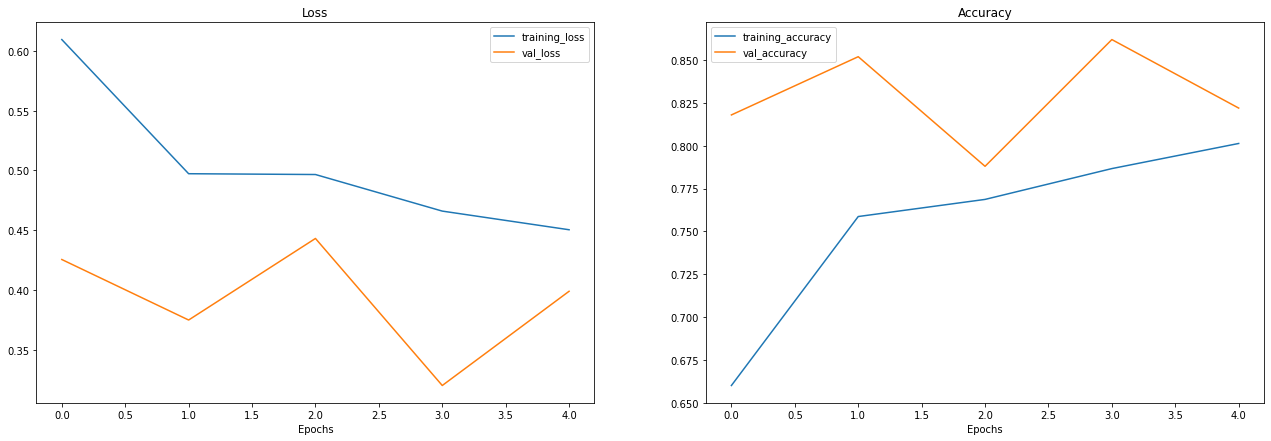

In [ ]:
# Plot loss curves
plot_loss_curves_2(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

#7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we coud try to continue to improve our model:

* Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer** learning to leverage what another image model has learn and adjust it for our own use case

> Practice : Recreate the model on the CNN explainer website and see how it performs!

## Making a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-04-03 16:28:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-04-03 16:28:02 (27.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



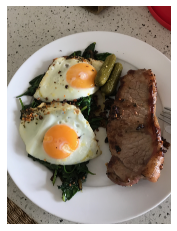

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  """
    reads an image from filename and turns it into tensor and reshapes it to (img_Shape, img_shape, color)
  """
  # read the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Ressize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Rescale the image
  img = img / 255.

  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9644849]], dtype=float32)

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

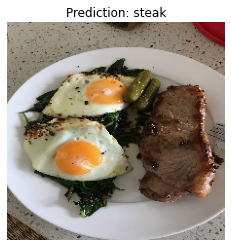

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

--2022-04-03 17:14:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-04-03 17:14:16 (34.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



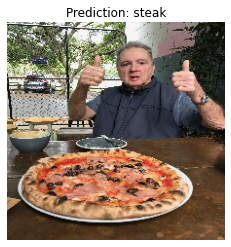

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [ ]:
# pizza = mpimg.imread("03-pizza-dad.jpeg")

pizza = load_and_prep_image("03-pizza-dad.jpeg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2887255 , 0.3009804 , 0.2632353 ],
        [0.44705883, 0.47843137, 0.39607844],
        [0.57598037, 0.5955882 , 0.5093137 ],
        ...,
        [0.05686275, 0.06862745, 0.04117647],
        [0.05588235, 0.0754902 , 0.04803922],
        [0.07745098, 0.08921569, 0.06176471]],

       [[0.9377451 , 0.9553922 , 0.9651961 ],
        [0.8838235 , 0.9102941 , 0.92107844],
        [0.9411765 , 0.9607843 , 0.9588235 ],
        ...,
        [0.04313726, 0.05490196, 0.02745098],
        [0.07843138, 0.09019608, 0.0627451 ],
        [0.08186275, 0.10147059, 0.07401961]],

       [[0.12745099, 0.13529412, 0.12352941],
        [0.175     , 0.17450981, 0.16617647],
        [0.12941177, 0.14901961, 0.13333334],
        ...,
        [0.03431373, 0.05196078, 0.0245098 ],
        [0.05833333, 0.07009804, 0.04264706],
        [0.05343137, 0.08088236, 0.0495098 ]],

       ...,

       [[0.24264705, 0.16029412, 0.07794118],
        [0.23

In [ ]:
pred_1 = model_7.predict(tf.expand_dims(pizza, axis=0))
pred_1

array([[0.7207288]], dtype=float32)

## Let's try to improve upon more...